<a href="https://colab.research.google.com/github/7tiesdan/IntroToPythonLCC/blob/main/Daniel_Nachimson_CapstoneProject_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#merging first two csv files, resulting in 2m rows. There were up to 5 separate csv files!#
df = pd.concat(
    map(pd.read_csv,['/content/drive/MyDrive/202405-citibike-tripdata_1.csv','/content/drive/MyDrive/202405-citibike-tripdata_2.csv']), ignore_index=True)



<ipython-input-1-422fff84f81f>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(
<ipython-input-1-422fff84f81f>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(


In [2]:
df.shape

(2000000, 13)

In [3]:
#What types of data are we working with?#
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
#any missing data or null values?#
df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name     564
start_station_id       564
end_station_name      1097
end_station_id        1719
start_lat                0
start_lng                0
end_lat                130
end_lng                130
member_casual            0
dtype: int64

In [5]:
#cleanup of any rows with null values for the six columns as shown above, and determine how many entries are ultimately removed#
df = df.dropna()
df.shape

(1997903, 13)

In [6]:
#survey data after removal of null values#
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [7]:
# prompt: calculate % of 2,000,000 that is 2,097, and print "This is the percentage of entries removed with null values:"

percentage_removed = (2000000 - 1997903) / 2000000 * 100
print("This is the percentage of entries removed with null values: {:.2f}%".format(percentage_removed))


This is the percentage of entries removed with null values: 0.10%


AttributeError: Stamen

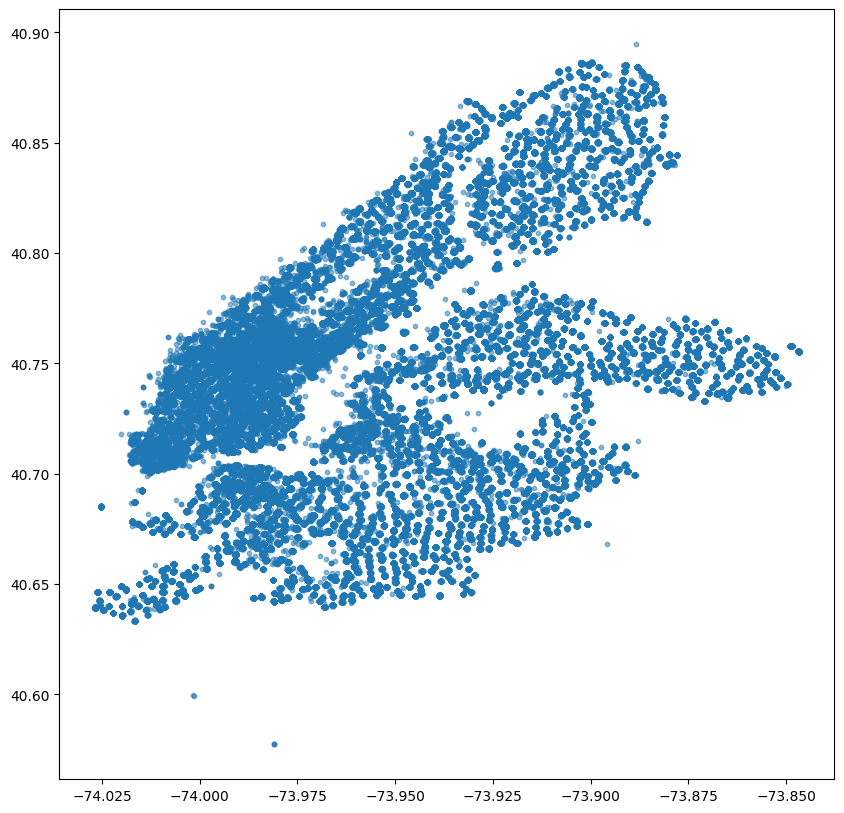

In [13]:
from os import pipe
# prompt: Using matplotlib, show a geographic map of all geolocations found using the 'start_lat' and 'start_lng' coordinates, overlaid on a street map

!pip install contextily
import matplotlib.pyplot as plt
import contextily as ctx

# Extract latitude and longitude
start_latitudes = df['start_lat']
start_longitudes = df['start_lng']

# Create a scatter plot of the locations
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(start_longitudes, start_latitudes, s=10, alpha=0.5)

# Add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.Stamen.TonerLite)

# Set plot title and labels
ax.set_title('Citi Bike Start Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [12]:
# prompt: count and display total number of unique object values for column 'start_station_id'

unique_start_stations = df['start_station_name'].nunique()
print("Total number of unique start stations:", unique_start_stations)


Total number of unique start stations: 2142


In [11]:
unique_end_stations = df['end_station_name'].nunique()
print("Total number of unique end stations:", unique_end_stations)

Total number of unique end stations: 2130


Station ID # 3208.07 represents the Citibike station closest to my home, at intersection of Dahill Rd and 12th Ave in Brooklyn

In [10]:
#calculate how many entries represent bike trips departing from station ID 3208.07#

df_filtered = df[df['start_station_id'] == "3208.07"]
number_of_rows = len(df_filtered)
print(f"Number of rows where 'start_station_name' equals '3208.07': {number_of_rows}")

Number of rows where 'start_station_name' equals '3208.07': 161


In [9]:
#calculate how many entries represent bike trips ENDING at station ID 3208.07#

df_filtered = df[df['end_station_id'] == "3208.07"]
number_of_rows = len(df_filtered)
print(f"Number of rows where 'end_station_name' equals '3208.07': {number_of_rows}")

Number of rows where 'end_station_name' equals '3208.07': 54


In [14]:
Minna_start = df[df['start_station_id'] == "3208.07"]
Minna_end = df[df['end_station_id'] == "3208.07"]

In [15]:
Minna_start.head().T

,14720,40183,46147,46176,85008
ride_id,43E50FD86F89BD43,E8CD61050FA5A420,1C77C306D0274ABC,DD1C19D677C3757C,66FF411F8A8596DD
rideable_type,electric_bike,electric_bike,electric_bike,classic_bike,classic_bike
started_at,2024-05-08 17:21:12,2024-05-21 16:10:28,2024-05-22 16:27:52,2024-05-14 18:55:54,2024-05-17 18:12:14
ended_at,2024-05-08 17:40:23,2024-05-21 16:40:13,2024-05-22 16:30:25,2024-05-14 19:50:38,2024-05-17 18:42:42
start_station_name,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave
start_station_id,3208.07,3208.07,3208.07,3208.07,3208.07
end_station_name,Marcus Garvey Blvd & Macon St,Pioneer St & Van Brunt St,Church Ave & McDonald Ave,Church Ave & McDonald Ave,46 St & 7 Ave
end_station_id,4278.03,4169.04,3090.06,3090.06,3117.05
start_lat,40.645914,40.646137,40.645878,40.646037,40.646037
start_lng,-73.980983,-73.980874,-73.980916,-73.980963,-73.980963


In [16]:
Minna_start.shape

(161, 13)

In [17]:
Minna_end.shape

(54, 13)

In [18]:
# prompt: Describe MinnaStart using 'started_at' & 'ended_at' parameters

# Describe MinnaStart using 'started_at' & 'ended_at' parameters

print(Minna_start['started_at'].describe())
print('','','')
print(Minna_end['ended_at'].describe())


count                     161
unique                    161
top       2024-05-08 17:21:12
freq                        1
Name: started_at, dtype: object
  
count                      54
unique                     54
top       2024-05-29 19:19:56
freq                        1
Name: ended_at, dtype: object


In [19]:

#show all starting locations for trips from MinnaStart, by number of rides#
Minna_start.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False)

end_station_name
Albemarle Rd & McDonald Ave       13
Church Ave & Story St             13
Chester Ave & 12 Ave              10
Park Circle & East Dr             10
Caton Ave & Argyle Rd              7
                                  ..
5 Ave & 67 St                      1
Marcus Garvey Blvd & Macon St      1
Matthews Ct & Coney Island Ave     1
New York Ave & Snyder Ave          1
11 Ave & Prospect Ave              1
Name: ride_id, Length: 71, dtype: int64

In [20]:
# prompt: show list of results for grouping MinnaStart by 'end_station_name' and by 'ride_id' with no limit of rows

Minna_start.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False).to_frame().reset_index()


,end_station_name,ride_id
0,Albemarle Rd & McDonald Ave,13
1,Church Ave & Story St,13
2,Chester Ave & 12 Ave,10
3,Park Circle & East Dr,10
4,Caton Ave & Argyle Rd,7
...,...,...
66,5 Ave & 67 St,1
67,Marcus Garvey Blvd & Macon St,1
68,Matthews Ct & Coney Island Ave,1
69,New York Ave & Snyder Ave,1


In [21]:
#show all starting locations for trips to Minna_end, by number of rides#
Minna_end.groupby(['start_station_name'])['ride_id'].count().sort_values(ascending=False).to_frame().reset_index()

,start_station_name,ride_id
0,36 St & 3 Ave,11
1,Park Circle & East Dr,5
2,34 St & 4 Ave,4
3,12 Ave & 36 St,3
4,7 Ave & 17 St,2
5,Church Ave & Story St,2
6,36 St & 4 Ave,2
7,Parkside Ave & Flatbush Ave,2
8,E 18 St & Church Ave,1
9,Eastern Pkwy & Franklin Ave (NE Corner),1


In [22]:
#comprehensive list of station names with their corresponding station ID's#
Minna_end.groupby(['start_station_name','start_station_id'])['end_station_id'].count().sort_values(ascending=False).to_frame().reset_index()

,start_station_name,start_station_id,end_station_id
0,36 St & 3 Ave,3460.02,11
1,Park Circle & East Dr,3344.02,5
2,34 St & 4 Ave,3492.04,4
3,12 Ave & 36 St,3056.05,3
4,7 Ave & 17 St,3660.07,2
5,Church Ave & Story St,3007.05,2
6,36 St & 4 Ave,3420.01,2
7,Parkside Ave & Flatbush Ave,3480.04,2
8,E 18 St & Church Ave,3263.01,1
9,Eastern Pkwy & Franklin Ave (NE Corner),3919.07,1


In [23]:
#generate a list of End Stations to see name and ID's in order to determine those stations closest to target area of Minna St#

Minna_start.groupby(['end_station_name','end_station_id'])['start_station_id'].count().sort_values(ascending=False).to_frame().reset_index()

,end_station_name,end_station_id,start_station_id
0,Albemarle Rd & McDonald Ave,3166.03,13
1,Church Ave & Story St,3007.05,13
2,Chester Ave & 12 Ave,3135.04,10
3,Park Circle & East Dr,3344.02,10
4,Caton Ave & Argyle Rd,3303.03,7
...,...,...,...
69,46 St & 7 Ave,3117.05,1
70,Marcus Garvey Blvd & Macon St,4278.03,1
71,Matthews Ct & Coney Island Ave,3034.02,1
72,New York Ave & Snyder Ave,3246.06,1


In [24]:
# prompt: For 'end_station_id' value 3166.03, show corresponding string data found in 'end_station_name'

df_filtered = df[df['end_station_id'] == "3166.03"]
end_station_name = df_filtered['end_station_name'].iloc[0]
print(f"The end station name for end_station_id 3166.03 is: {end_station_name}")


The end station name for end_station_id 3166.03 is: Albemarle Rd & McDonald Ave


In [25]:
# prompt: For 'end_station_id' value 3007.05, show corresponding string data found in 'end_station_name'

df_filtered = df[df['end_station_id'] == "3007.05"]
end_station_name = df_filtered['end_station_name'].iloc[0]
print(f"The end station name for end_station_id 3007.05 is: {end_station_name}")


The end station name for end_station_id 3007.05 is: Church Ave & Story St




---


Below, I needed a list of docking stations to reference, showing Station Name
(for location) and Station ID number.


---






In [26]:
# prompt: Generate list showing unique values of 'start_station_id' and 'start_station_name' for 'start_station_id' of 3208.07 & 3090.06 & 3166.03 & 3007.05 & 3135.04, the six closest stations to Minna Stree location#

# Create a list of station IDs
station_ids = ["3208.07", "3090.06", "3166.03", "3007.05", "3135.04", "3056.05"]

# Filter the dataframe for the given station IDs
filtered_df = df[df["start_station_id"].isin(station_ids)]

# Get unique values of 'start_station_id' and 'start_station_name'
unique_stations = filtered_df[["start_station_id", "start_station_name"]].drop_duplicates()

# Print the unique stations
print(unique_stations)


      start_station_id           start_station_name
782            3166.03  Albemarle Rd & McDonald Ave
2958           3007.05        Church Ave & Story St
4371           3090.06    Church Ave & McDonald Ave
7610           3056.05               12 Ave & 36 St
14720          3208.07           Dahill Rd & 12 Ave
39180          3135.04         Chester Ave & 12 Ave


Using this  template for creating new subsets of data for the above 6 designated neighborhood bike stations:
xxx_start = df[df['start_station_id'] == "xxxx.xx"]
xxx_end = df[df['end_station_id'] == "xxxx.xx"]
xxx_start.shape
xxx_end.shape

In [27]:
#Creating subsets for station 3166.03 - Albemarle Rd & McDonald Ave#
AlbMc_start = df[df['start_station_id'] == "3166.03"]
AlbMc_end = df[df['end_station_id'] == "3166.03"]
AlbMc_start.shape
AlbMc_end.shape



(565, 13)

In [28]:
#Creating subsets for station 3007.05 - Church Av & Story St#
ChStory_start = df[df['start_station_id'] == "3007.05"]
ChStory_end = df[df['end_station_id'] == "3007.05"]
ChStory_start.shape
ChStory_end.shape


(395, 13)

In [29]:
ChStory_start.shape

(250, 13)

In [30]:
#Creating subsets for station 3090.06 - Church Ave & McDonald Ave#
ChMc_start = df[df['start_station_id'] == "3090.06"]
ChMc_end = df[df['end_station_id'] == "3090.06"]
ChMc_end.shape

(92, 13)

In [31]:
#Creating subsets for station 3056.05 - 12 Ave & 36 St#
TweThirtySix_start = df[df['start_station_id'] == "3056.05"]
TweThirtySix_end = df[df['end_station_id'] == "3056.05"]
TweThirtySix_end.shape
TweThirtySix_start.shape

(276, 13)

In [32]:
#Creating subset for station 3135.04 - Chester Av & 12 Ave#
Chester_Twe_start = df[df['start_station_id'] == "3135.04"]
Chester_Twe_end = df[df['end_station_id'] == "3135.04"]
Chester_Twe_start.shape
Chester_Twe_end.shape


(303, 13)

In [33]:
Chester_Twe_end.head().T

,79112,79569,79639,128426,128517
ride_id,483393FD3CFB00F4,7EBD7C5DAECAC438,71BBF5B7F29A3B7D,1820C8952B54AD3A,56603189D308D2DB
rideable_type,classic_bike,electric_bike,electric_bike,classic_bike,electric_bike
started_at,2024-05-22 06:31:25,2024-05-17 19:19:06,2024-05-19 20:14:25,2024-05-08 09:11:38,2024-05-26 08:51:39
ended_at,2024-05-22 06:55:15,2024-05-17 19:29:17,2024-05-19 20:42:18,2024-05-08 09:15:37,2024-05-26 10:15:05
start_station_name,Chester Ave & 12 Ave,Prospect Park SW & 10 Ave,Bedford Ave & S 9 St,E 3 St & Church Ave,Albemarle Rd & McDonald Ave
start_station_id,3135.04,3611.02,5093.01,3046.03,3166.03
end_station_name,Chester Ave & 12 Ave,Chester Ave & 12 Ave,Chester Ave & 12 Ave,Chester Ave & 12 Ave,Chester Ave & 12 Ave
end_station_id,3135.04,3135.04,3135.04,3135.04,3135.04
start_lat,40.644367,40.659845,40.708396,40.643817,40.64507
start_lng,-73.984276,-73.977305,-73.966273,-73.977433,-73.97958


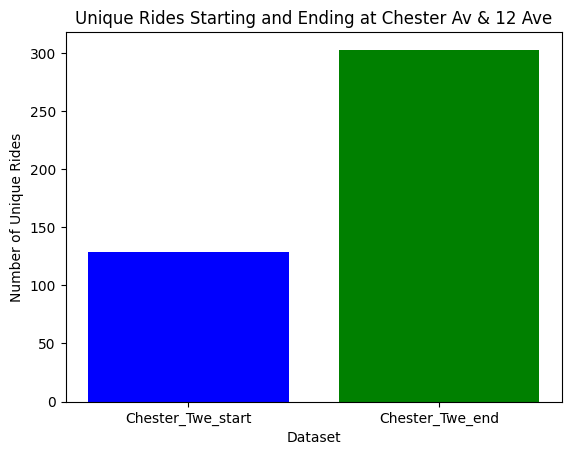

In [34]:
# prompt: Using Chester_Twe_start and Chester_Twe_end data sets, plot bar graph for number of unique values for 'ride_id' - blue for Chester_Twe_start value and green for Chester_Twe_end value

import matplotlib.pyplot as plt

# Count unique ride IDs
start_count = Chester_Twe_start['ride_id'].nunique()
end_count = Chester_Twe_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['Chester_Twe_start', 'Chester_Twe_end'], [start_count, end_count], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Chester Av & 12 Ave')
plt.show()


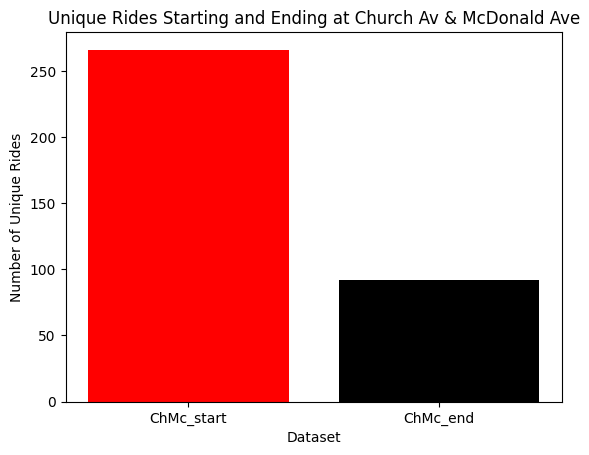

In [35]:
# Count unique ride IDs
start_count = ChMc_start['ride_id'].nunique()
end_count = ChMc_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['ChMc_start', 'ChMc_end'], [start_count, end_count], color=['red', 'black'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Church Av & McDonald Ave')
plt.show()

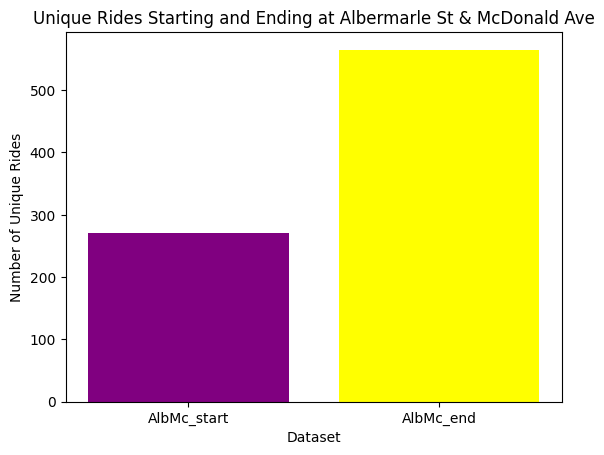

In [36]:
# Count unique ride IDs
start_count = AlbMc_start['ride_id'].nunique()
end_count = AlbMc_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['AlbMc_start', 'AlbMc_end'], [start_count, end_count], color=['purple', 'yellow'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Albermarle St & McDonald Ave')
plt.show()

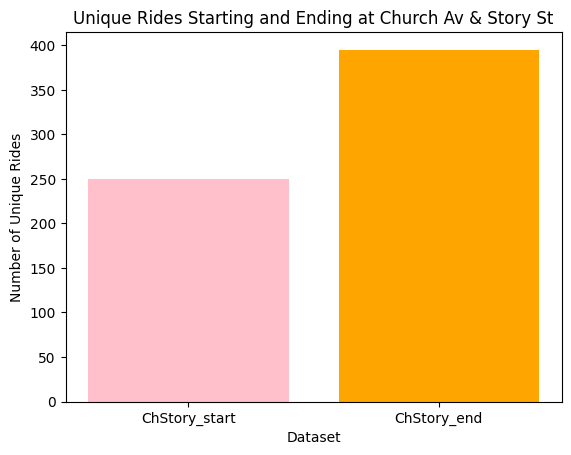

In [37]:
# Count unique ride IDs
start_count = ChStory_start['ride_id'].nunique()
end_count = ChStory_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['ChStory_start', 'ChStory_end'], [start_count, end_count], color=['pink', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Church Av & Story St')
plt.show()

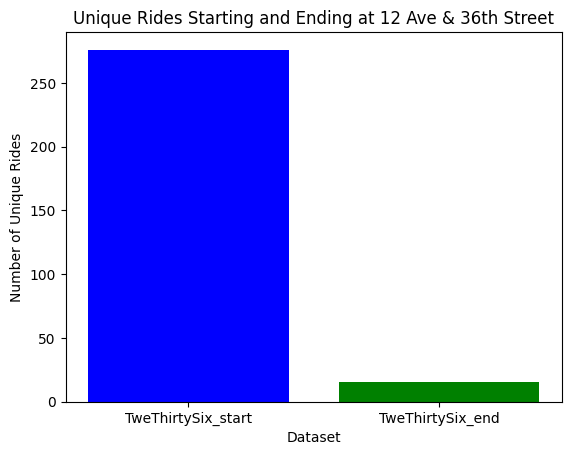

In [38]:
# Count unique ride IDs
start_count = TweThirtySix_start['ride_id'].nunique()
end_count = TweThirtySix_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['TweThirtySix_start', 'TweThirtySix_end'], [start_count, end_count], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at 12 Ave & 36th Street')
plt.show()

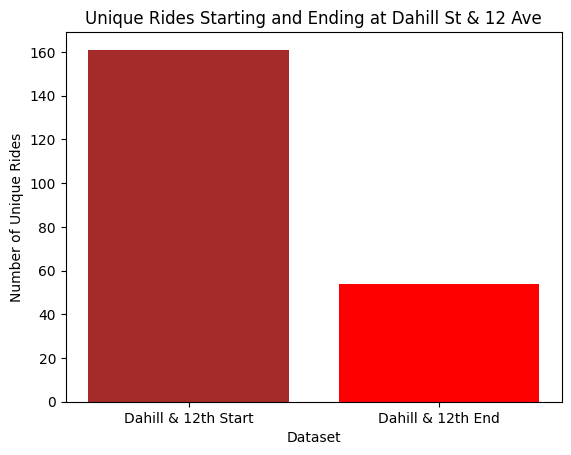

In [39]:
# Count unique ride IDs
start_count = Minna_start['ride_id'].nunique()
end_count = Minna_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['Dahill & 12th Start', 'Dahill & 12th End'], [start_count, end_count], color=['brown', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Dahill St & 12 Ave')
plt.show()

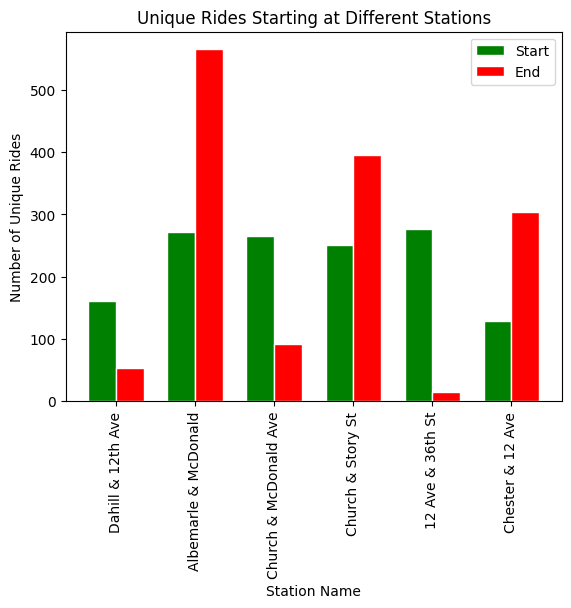

In [40]:
# prompt: Plot singular bar graph for number of unique values for 'ride_id' pairing the following data sets: Chester_Twe_start and Chester_Twe_end, ChMc_start and ChMc_end, ChStory_start and ChStory_end, AlbMc_start and Alb_end, TweThirtySix_start and Twe_ThirtySix_end, Minna_start and Minna_end

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]

end_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Labels for the bars
labels = [
    'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'
]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r1, start_counts, color='green', width=bar_width, edgecolor='white', label='Start')
plt.bar(r2, end_counts, color='red', width=bar_width, edgecolor='white', label='End')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Starting at Different Stations')
plt.legend()

# Display the graph
plt.show()


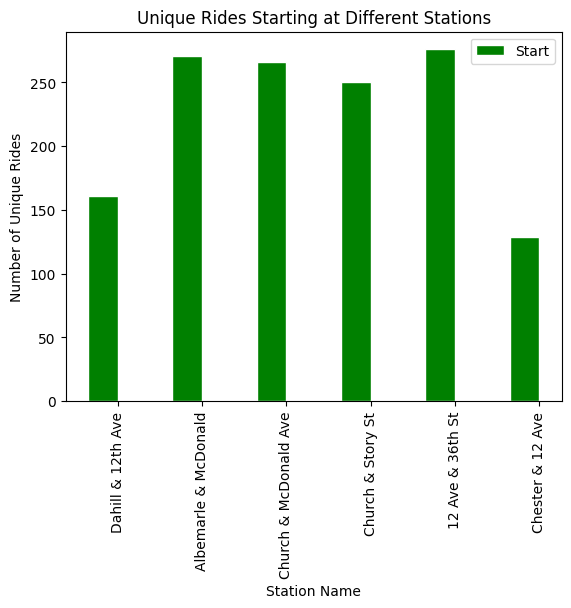

In [41]:
# prompt: Replot the above bar graph with vertical text in x-axis

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]


# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'

]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r1, start_counts, color='green', width=bar_width, edgecolor='white', label='Start')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Starting at Different Stations')

plt.legend()

# Display the graph
plt.show()


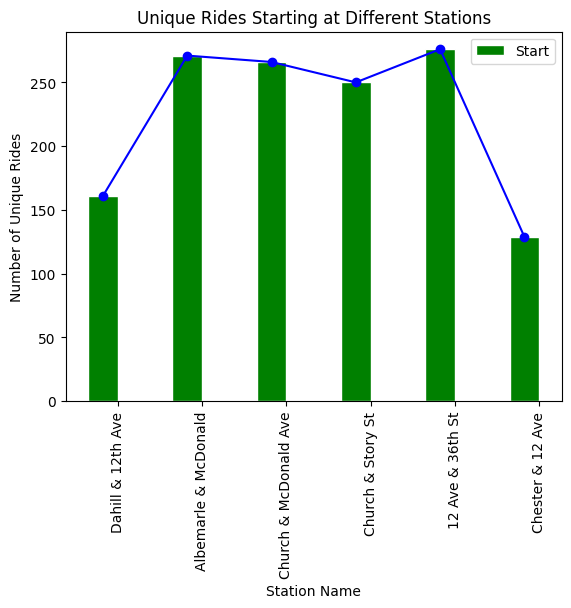

In [42]:
# prompt: Generate the above bar chart with a line connecting the tops of the six bars

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]


# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'

]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r1, start_counts, color='green', width=bar_width, edgecolor='white', label='Start')

# Add a line connecting the tops of the bars
plt.plot(r1, start_counts, color='blue', marker='o')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Starting at Different Stations')

plt.legend()

# Display the graph
plt.show()


In [43]:
# prompt: show value of average number of unique rides for the above bar graph

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]

# Calculate the average number of unique rides
average_starts = sum(start_counts) / len(start_counts)

print("Average number of unique rides STARTING at these stations: ", average_starts)


Average number of unique rides STARTING at these stations:  225.5


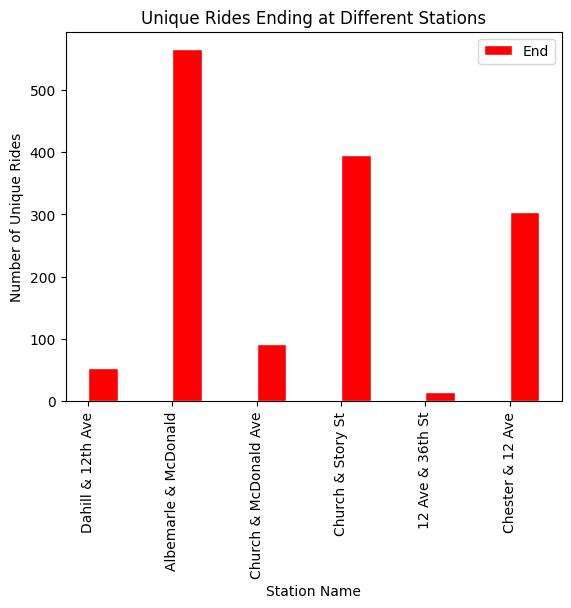

In [44]:
# prompt: Plot singular bar graph for number of unique values for 'ride_id' pairing the following data sets: Chester_Twe_start and Chester_Twe_end, ChMc_start and ChMc_end, ChStory_start and ChStory_end, AlbMc_start and Alb_end, TweThirtySix_start and Twe_ThirtySix_end, Minna_start and Minna_end

# Count unique ride IDs for each dataset

end_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'
]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r2, end_counts, color='red', width=bar_width, edgecolor='white', label='End')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Ending at Different Stations')
plt.legend()

# Display the graph
plt.show()


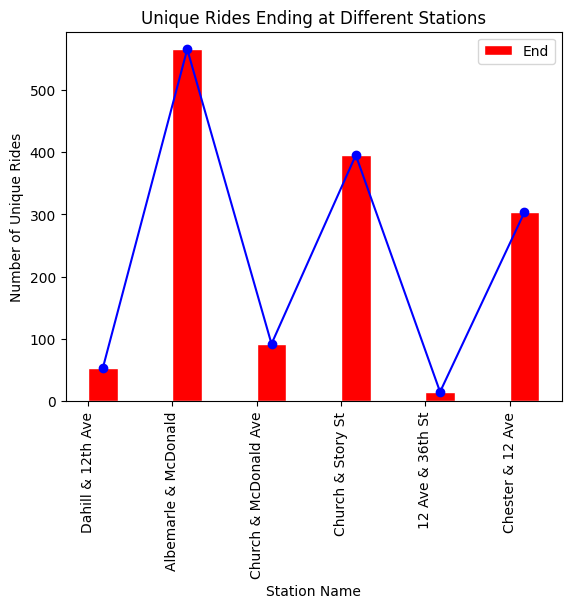

In [45]:
# prompt: Generate the above bar chart with a line connecting the tops of the six bars

# Count unique ride IDs for each dataset

end_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'
]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r2, end_counts, color='red', width=bar_width, edgecolor='white', label='End')

# Add a line connecting the tops of the bars
plt.plot(r2, end_counts, color='blue', marker='o')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Ending at Different Stations')
plt.legend()

# Display the graph
plt.show()


In [46]:
# prompt: show value of average number of unique rides for the above bar graph

# Count unique ride IDs for each dataset

end_counts = [
    Chester_Twe_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Minna_end['ride_id'].nunique()
]

# Calculate the average number of unique rides
average_ends = sum(end_counts) / len(end_counts)

print("Average number of unique rides ENDING at these stations: ", average_ends)


Average number of unique rides ENDING at these stations:  237.33333333333334


In [47]:
# prompt: show value of average number of unique rides for Minna_end, ChMc_end, and TweThirtySix_end

# Count unique ride IDs for each dataset

end_counts = [
    Minna_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique()
]

# Calculate the average number of unique rides
average_ends = sum(end_counts) / len(end_counts)

print("Average number of unique rides ending at these stations: ", average_ends)


Average number of unique rides ending at these stations:  53.666666666666664


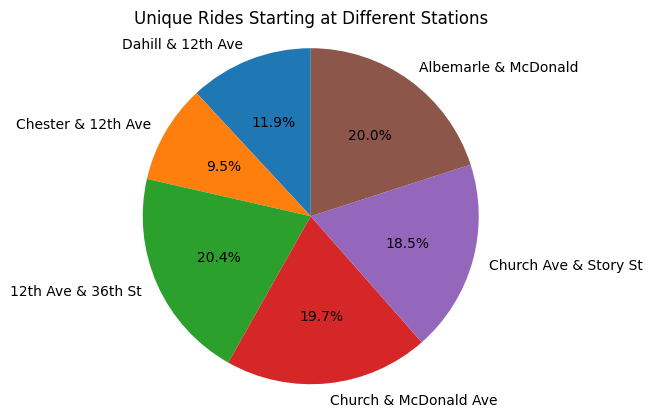

In [48]:
# prompt: Plot pie chart showing total values of totals for 'unique_ride_id' for the following datasets
# Minna_start
# Chester_Twe_start
# TweThirtySix_start
# ChMc_start
# ChStory_start
# AlbMc_start

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique()
]

# Labels for the pie chart
labels = [
    'Dahill & 12th Ave',
    'Chester & 12th Ave',
    '12th Ave & 36th St',
    'Church & McDonald Ave',
    'Church Ave & Story St',
    'Albemarle & McDonald'
]

# Plot the pie chart
plt.pie(start_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Unique Rides Starting at Different Stations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


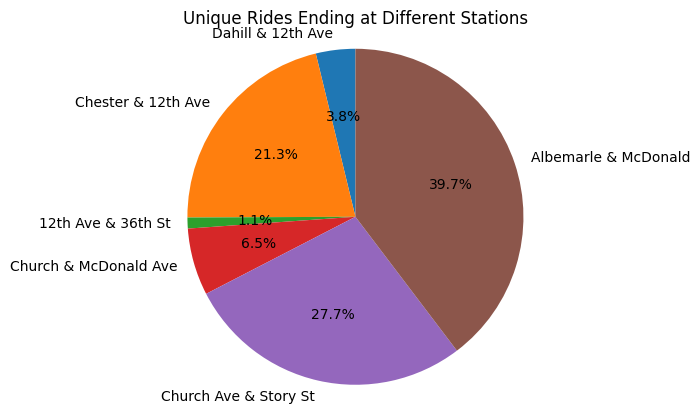

In [49]:
# prompt: Plot pie chart showing total values of totals for 'unique_ride_id' for the following datasets
# Minna_end
# Chester_Twe_end
# TweThirtySix_end
# ChMc_end
# ChStory_end
# AlbMc_end

# Count unique ride IDs for each dataset
end_counts = [
    Minna_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique()
]

# Labels for the pie chart
labels = [
    'Dahill & 12th Ave',
    'Chester & 12th Ave',
    '12th Ave & 36th St',
    'Church & McDonald Ave',
    'Church Ave & Story St',
    'Albemarle & McDonald'
]

# Plot the pie chart
plt.pie(end_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Unique Rides Ending at Different Stations')
(",")
(" ")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


In [50]:
# prompt: Plot a geographic map overlaid on a street map, using 'end_lat' and 'end_lng' coordinates found for dataframes:
#  Minna_end
# Chester_Twe_end
# TweThirtySix_end
# ChMc_end
# ChStory_end
# AlbMc_end

!pip install gmplot

import gmplot

# Create a new map object centered around the mean latitude and longitude of all the dataframes.
# You might need to adjust the center coordinates and zoom level as needed.
gmap = gmplot.GoogleMapPlotter(40.66, -73.98, 13)

# Define a function to plot points for a given dataframe
def plot_end_points(df, color):
  lats = df['end_lat'].tolist()
  lngs = df['end_lng'].tolist()
  gmap.scatter(lats, lngs, color=color, size=50, marker=False)

# Plot points for each dataframe with different colors
plot_end_points(Minna_end, 'blue')
plot_end_points(Chester_Twe_end, 'red')
plot_end_points(TweThirtySix_end, 'green')
plot_end_points(ChMc_end, 'purple')
plot_end_points(ChStory_end, 'orange')
plot_end_points(AlbMc_end, 'yellow')

# Draw the map and save it to an HTML file
gmap.draw("my_map.html")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 3.5 MB/s eta 0:00:00


In [51]:
# prompt: Print a list of unique 'end_lat' and 'end_lng' coordinates for the following stations with these values for 'end_station_id':
# 3208.07
# 3090.06
# 3166.03
# 3007.05
# 3135.04
# 3056.05
# and generate a geographic map plotting these coordinates

# List of station IDs
station_ids = ["3208.07", "3090.06", "3166.03", "3007.05", "3135.04", "3056.05"]

# Create an empty list to store unique coordinates
unique_coords = []

# Iterate over station IDs and extract unique coordinates
for station_id in station_ids:
  subset = df[df['end_station_id'] == station_id]
  unique_coords.extend(subset[['end_lat', 'end_lng']].drop_duplicates().values.tolist())

# Print unique coordinates
print(unique_coords)

# Create a map centered around the mean of the coordinates
mean_lat = sum(coord[0] for coord in unique_coords) / len(unique_coords)
mean_lng = sum(coord[1] for coord in unique_coords) / len(unique_coords)
gmap = gmplot.GoogleMapPlotter(mean_lat, mean_lng, 13)

# Plot the coordinates on the map
lats = [coord[0] for coord in unique_coords]
lngs = [coord[1] for coord in unique_coords]
gmap.scatter(lats, lngs, color='red', size=50, marker=False)

# Draw the map and save it to an HTML file
gmap.draw("my_map.html")


[[40.646037, -73.980963], [40.642809, -73.979239], [40.645074, -73.979681], [40.642031, -73.981073], [40.644367, -73.984276], [40.643546, -73.986418]]


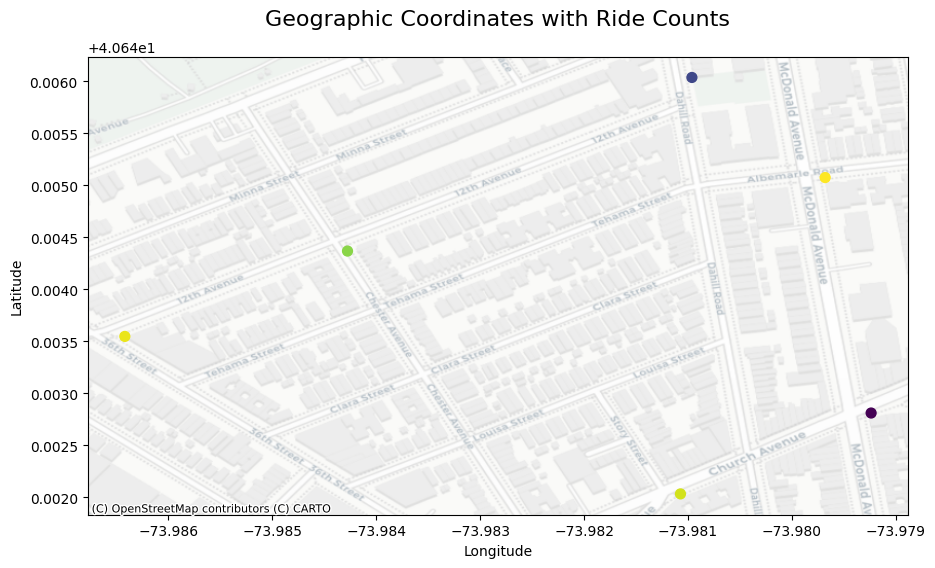

In [52]:
# prompt: Create the above map while showing sum of all unique entries in column 'ride_id' for the following data frames:
# Minna_start, Chester_Twe_start, TweThirtySix_start, ChMc_start, ChStory_start, AlbMc_start. Add extra space below the map title and the map.

!pip install contextily
import contextily as ctx
# Calculate the sum of unique ride_ids for each dataframe
ride_counts = [
    Minna_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique()
]

# Define the coordinates
coordinates = [[40.646037, -73.980963], [40.642809, -73.979239], [40.645074, -73.979681],
              [40.642031, -73.981073], [40.644367, -73.984276], [40.643546, -73.986418]]

# Extract latitudes and longitudes
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Create a scatter plot of the locations with ride counts as labels
fig, ax = plt.subplots(figsize=(10, 10))
sc = ax.scatter(longitudes, latitudes, s=50, c=ride_counts, cmap='viridis', zorder=2)

# Add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.Positron)

# Set plot title and labels
ax.set_title('Geographic Coordinates with Ride Counts\n', fontsize=16)  # Add extra space below title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')




# Adjust layout for extra space below the map
plt.tight_layout(pad=3.0)  # Increase pad value for more space

plt.show()


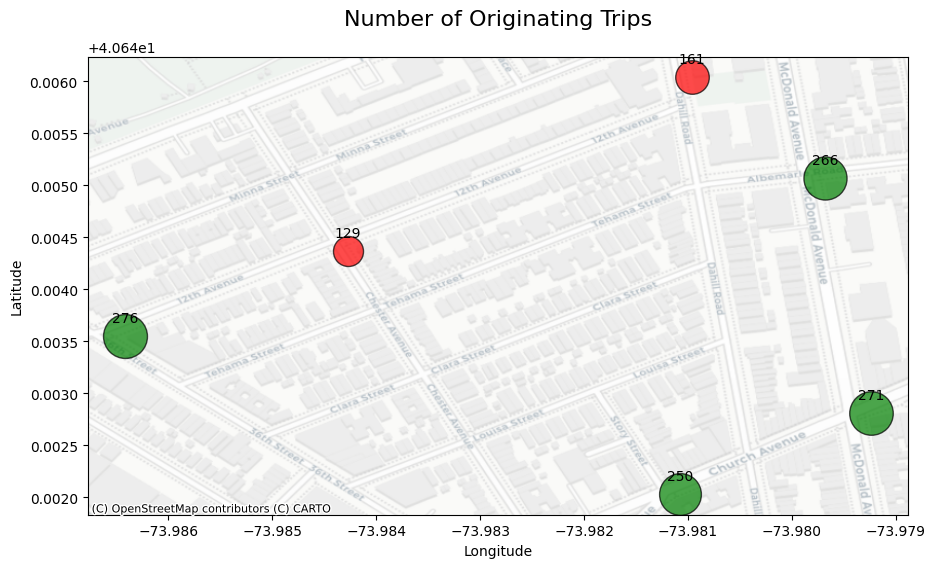

In [53]:
# prompt: Recreate the above map, and show the total values with corresponding dot sizes larger vs smaller and different colors for each dot

!pip install contextily
import contextily as ctx
# Calculate the sum of unique ride_ids for each dataframe
ride_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]

# Define the coordinates
coordinates = [[40.646037, -73.980963], [40.642809, -73.979239], [40.645074, -73.979681],
              [40.642031, -73.981073], [40.643546, -73.986418], [40.644367, -73.984276]]

# Extract latitudes and longitudes
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Normalize ride counts to scale dot sizes
normalized_counts = [count / max(ride_counts) for count in ride_counts]
sizes = [count * 1000 for count in normalized_counts]  # Adjust scaling factor as needed

# Define colors for each dot
colors = ['red', 'green', 'green', 'green', 'green', 'red']

# Create a scatter plot of the locations with varying dot sizes and colors
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(longitudes)):
    ax.scatter(longitudes[i], latitudes[i], s=sizes[i], c=colors[i], zorder=2, alpha=0.7, edgecolors='black')

# Add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.Positron)

# Set plot title and labels
ax.set_title('Number of Originating Trips\n', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Annotate points with ride counts
for i, count in enumerate(ride_counts):
    ax.annotate(str(count), (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust layout for extra space below the map
plt.tight_layout(pad=3.0)

plt.show()


In [54]:
# prompt: show value of total number of unique 'ride_id' for 'AlbMc_end'

# Count unique ride IDs for AlbMc_end
total_unique_rides = AlbMc_end['ride_id'].nunique()

# Print the result
print("Total number of unique 'ride_id' for 'AlbMc_end':", total_unique_rides)


Total number of unique 'ride_id' for 'AlbMc_end': 565


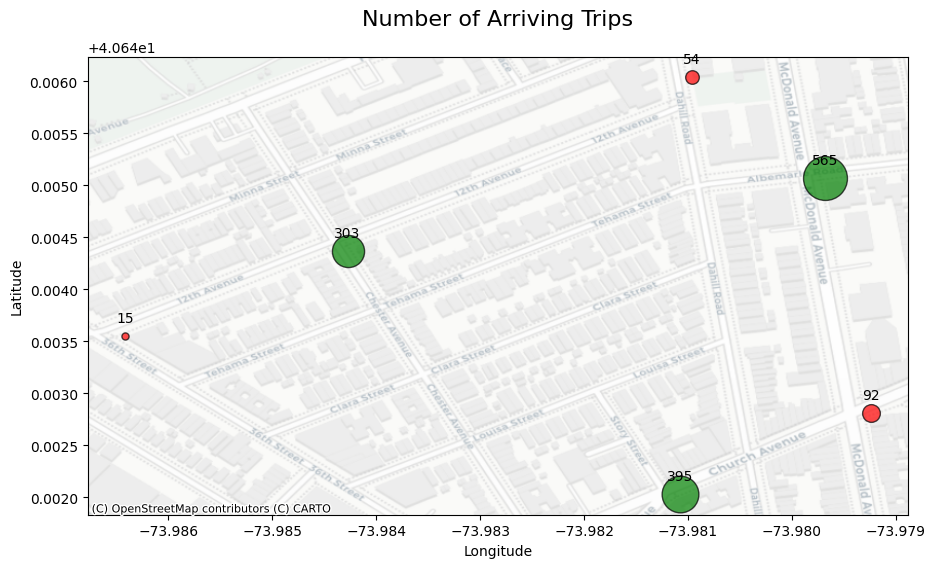

In [55]:
# prompt: Recreate the above, and show the total values with corresponding dot sizes larger vs smaller and different colors for each dot, applying to _end trips.

!pip install contextily


# Calculate the sum of unique ride_ids for each dataframe
ride_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Define the coordinates
coordinates = [[40.646037, -73.980963], [40.645074, -73.979681],[40.642809, -73.979239],
              [40.642031, -73.981073], [40.643546, -73.986418], [40.644367, -73.984276]]

# Extract latitudes and longitudes
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Normalize ride counts to scale dot sizes
normalized_counts = [count / max(ride_counts) for count in ride_counts]
sizes = [count * 1000 for count in normalized_counts]  # Adjust scaling factor as needed

# Define colors for each dot
colors = ['red', 'green', 'red', 'green', 'red', 'green']

# Create a scatter plot of the locations with varying dot sizes and colors
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(longitudes)):
    ax.scatter(longitudes[i], latitudes[i], s=sizes[i], c=colors[i], zorder=2, alpha=0.7, edgecolors='black')

# Add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.Positron)

# Set plot title and labels
ax.set_title('Number of Arriving Trips\n', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Annotate points with ride counts
for i, count in enumerate(ride_counts):
    ax.annotate(str(count), (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust layout for extra space below the map
plt.tight_layout(pad=3.0)

plt.show()